In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df=pd.read_csv('C:/Users/INNVERSE/Desktop/Machine Learning/marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [5]:
creditcard_df['CASH_ADVANCE'].max()


47137.211760000006

In [6]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


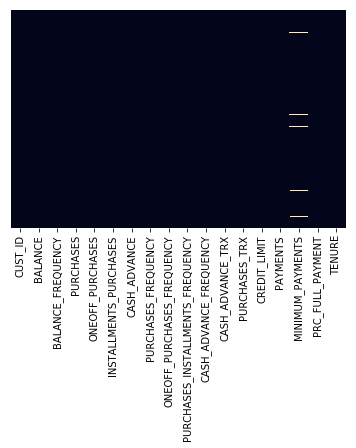

In [7]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False)

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [10]:
creditcard_df.duplicated().sum()

0

In [11]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

Text(0.5, 1.0, 'TENURE')

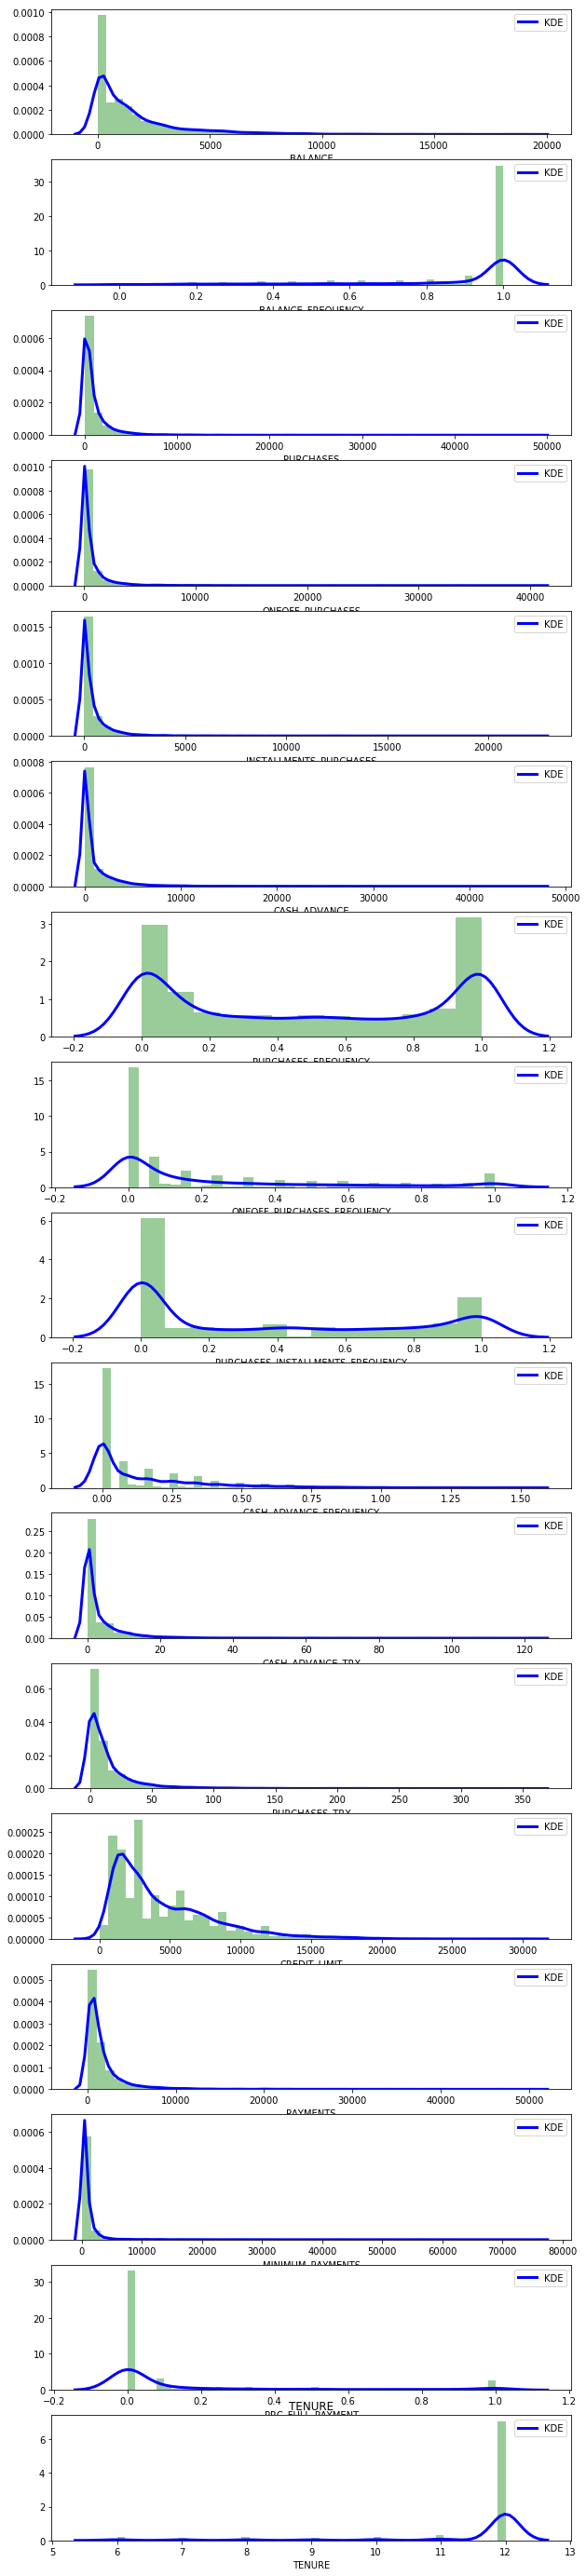

In [12]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b',"lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title(creditcard_df.columns[i])

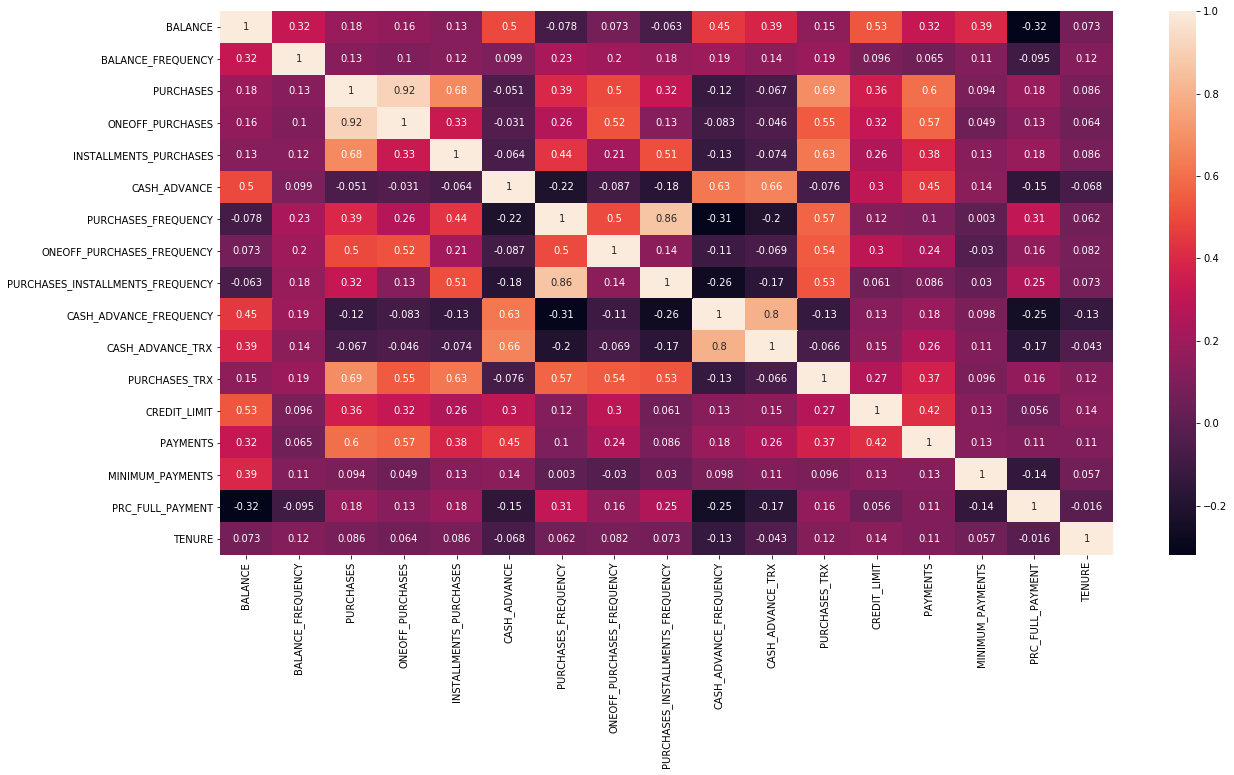

In [13]:
correlations=creditcard_df.corr()
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)

In [14]:
scaler=StandardScaler()
creditcard_scaled=scaler.fit_transform(creditcard_df)
creditcard_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

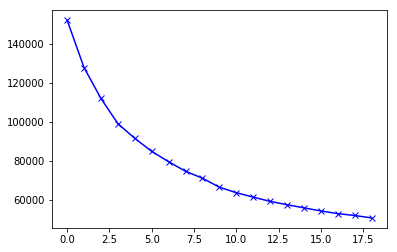

In [15]:
score=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_scaled)
    score.append(kmeans.inertia_)
plt.plot(score,'bx-')    

In [16]:
kmeans=KMeans(7)
kmeans.fit(creditcard_scaled)
labels=kmeans.labels_

In [17]:
kmeans.cluster_centers_.shape

(7, 17)

In [18]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.016371,0.371834,-0.344486,-0.223178,-0.404413,-0.088197,-0.822380,-0.333593,-0.767982,0.124454,-0.033653,-0.469600,-0.335204,-0.262500,-0.060225,-0.450688,-0.005039
1,-0.405292,0.306247,-0.067307,-0.244578,0.290159,-0.365013,0.966788,-0.374990,1.140763,-0.460018,-0.356562,0.120709,-0.328988,-0.251769,-0.113412,0.350194,-0.031521
2,-0.697914,-2.123999,-0.312811,-0.230807,-0.315505,-0.307487,-0.559186,-0.418579,-0.464188,-0.485557,-0.360230,-0.425488,-0.207963,-0.221046,-0.255897,0.262132,-0.166046
3,1.383583,0.417119,7.016565,6.215703,5.168605,0.034975,1.086434,1.916928,1.036323,-0.248997,-0.052162,4.697185,2.201598,4.830607,0.691038,0.852741,0.333992
4,1.568868,0.372947,-0.211656,-0.151811,-0.221638,1.951492,-0.460597,-0.190039,-0.415865,1.910576,1.855280,-0.252668,0.953265,0.766752,0.359680,-0.389586,-0.101308
5,0.138162,0.427732,0.922668,0.873771,0.576330,-0.308800,1.087619,1.841021,0.540579,-0.406274,-0.318535,1.176826,0.689878,0.378207,-0.046921,0.431888,0.273435
6,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092


In [19]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data= cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1530.400295,0.965355,267.205760,222.006950,45.362353,793.917391,0.160290,0.102941,0.059222,0.160049,3.019167,3.037343,3274.840273,973.231109,723.855032,2.189616e-02,11.510575
1,720.893760,0.949818,859.402948,186.487233,673.455172,213.422356,0.878369,0.090591,0.817806,0.043090,0.815552,17.710217,3297.454883,1004.297966,599.905200,2.561403e-01,11.475136
2,111.826150,0.374115,334.878326,209.345268,125.759969,334.056543,0.265922,0.077588,0.179957,0.037979,0.790520,4.133792,3737.793497,1093.237694,267.849362,2.303837e-01,11.295107
3,4444.285974,0.976082,15994.204643,10909.231905,5084.972738,1052.215268,0.926389,0.774315,0.776299,0.085317,2.892857,131.464286,12504.761905,15717.277508,2474.642600,4.031269e-01,11.964286
4,4829.941169,0.965618,550.999523,340.461421,210.643568,5071.241182,0.305491,0.145765,0.199162,0.517470,15.909751,8.429461,7962.815919,3952.814519,1702.424539,3.976750e-02,11.381743
5,1852.048286,0.978596,2974.498946,2042.718249,932.235588,331.303663,0.926865,0.751670,0.579277,0.053845,1.075057,43.961334,7004.508925,2828.016990,754.859270,2.800346e-01,11.883245
6,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,-8.326673e-17,11.918919


In [23]:
labels.shape

(8950,)

In [25]:
creditcard_cluster=pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcard_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


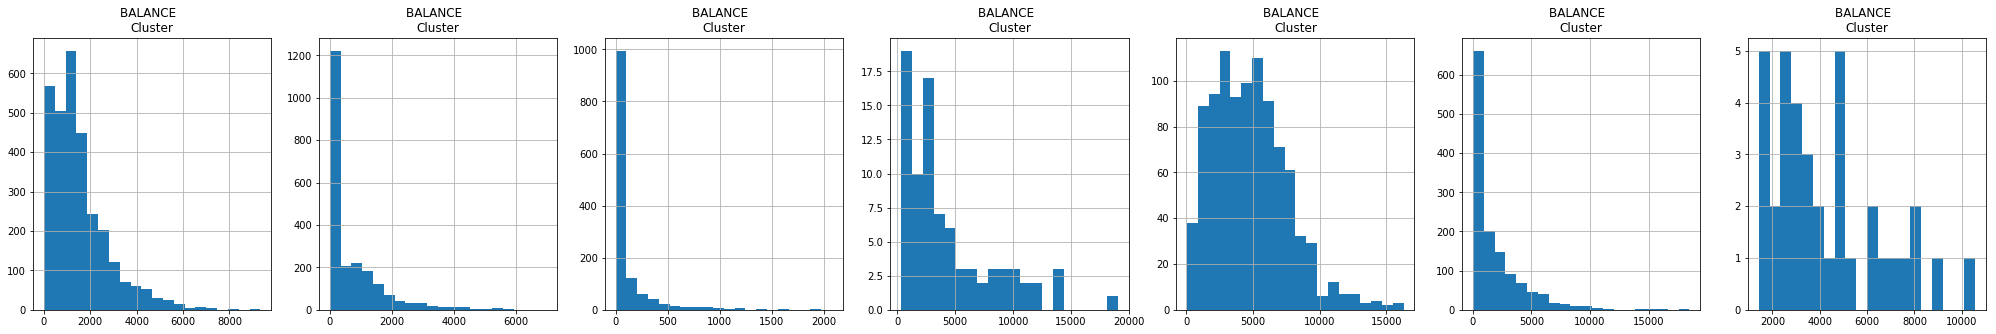

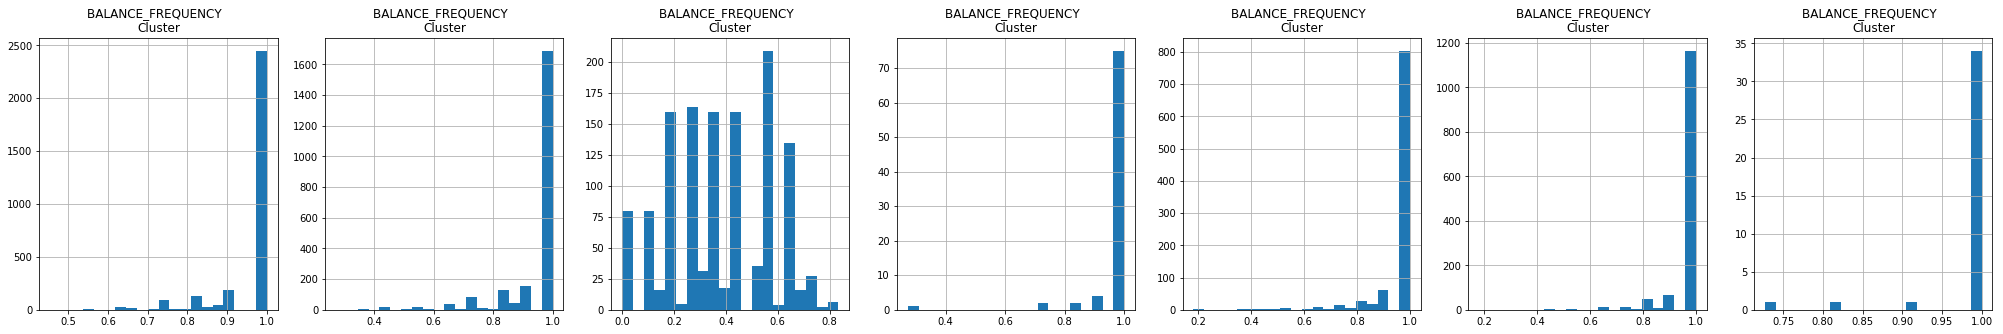

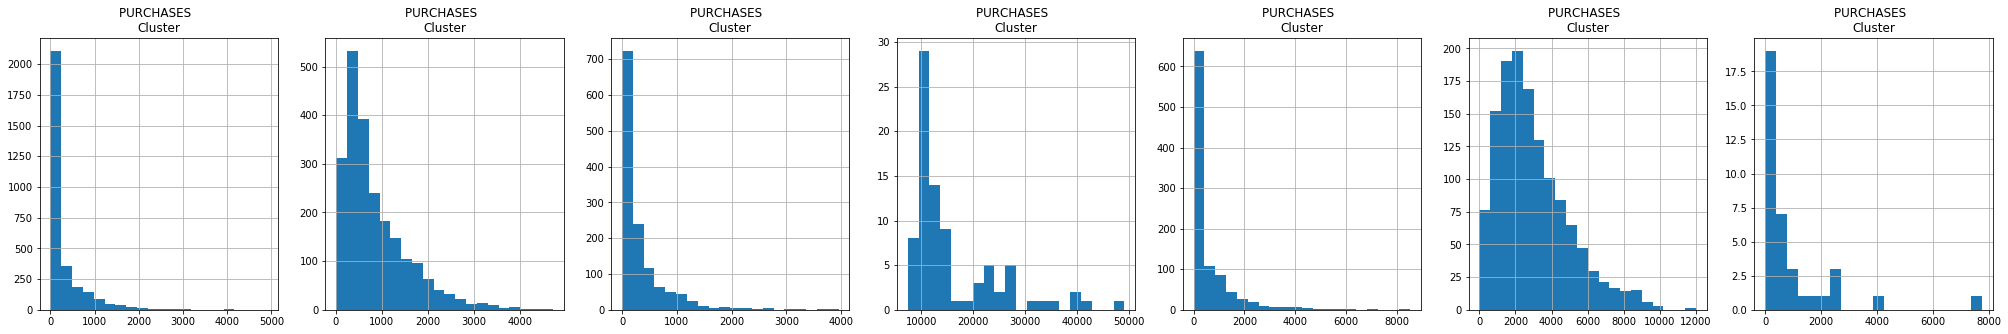

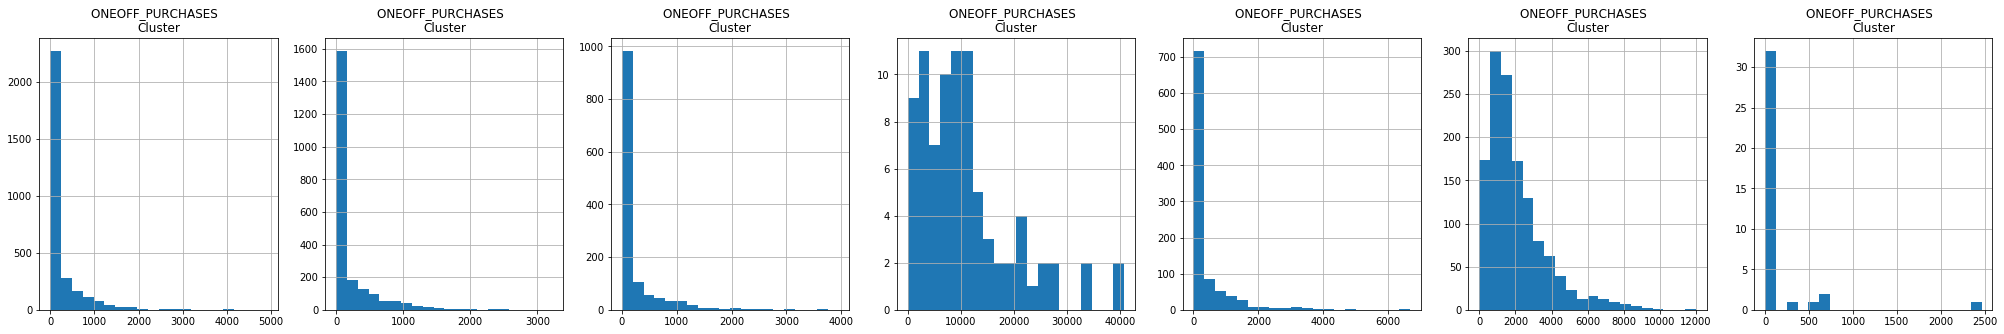

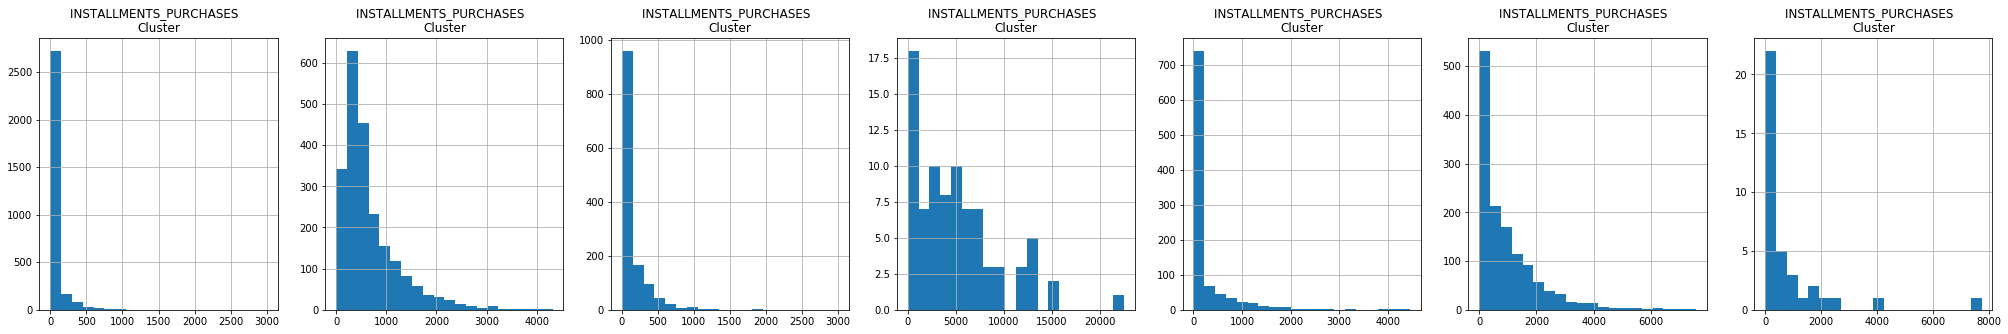

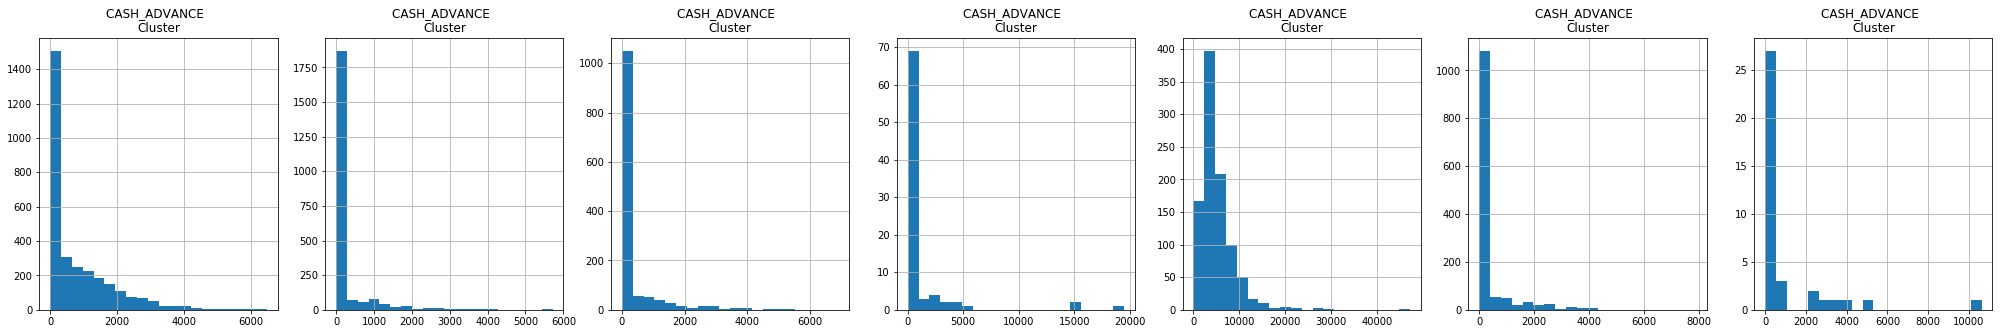

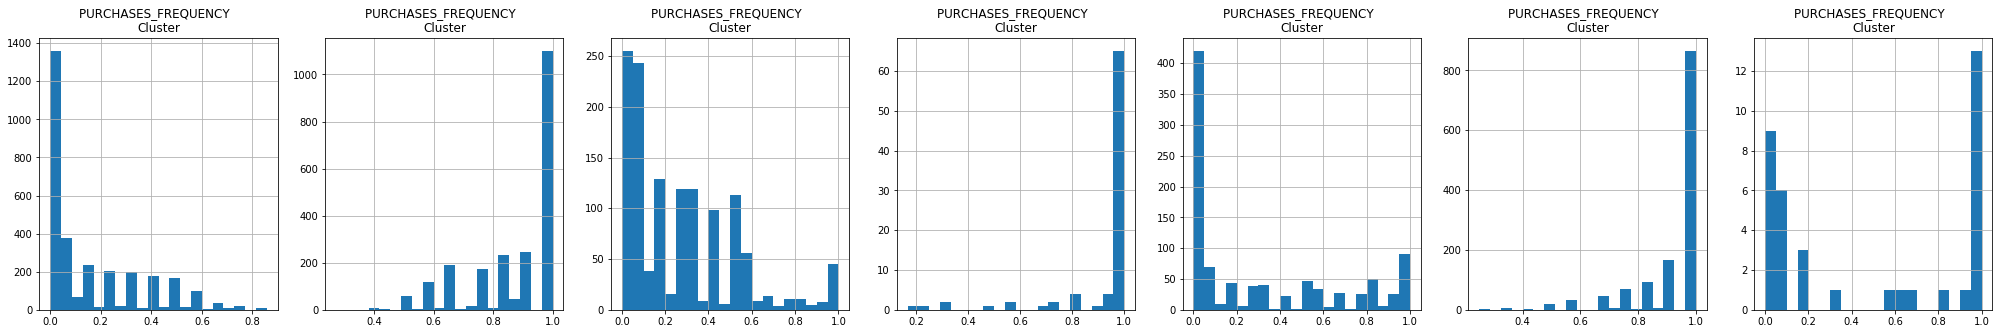

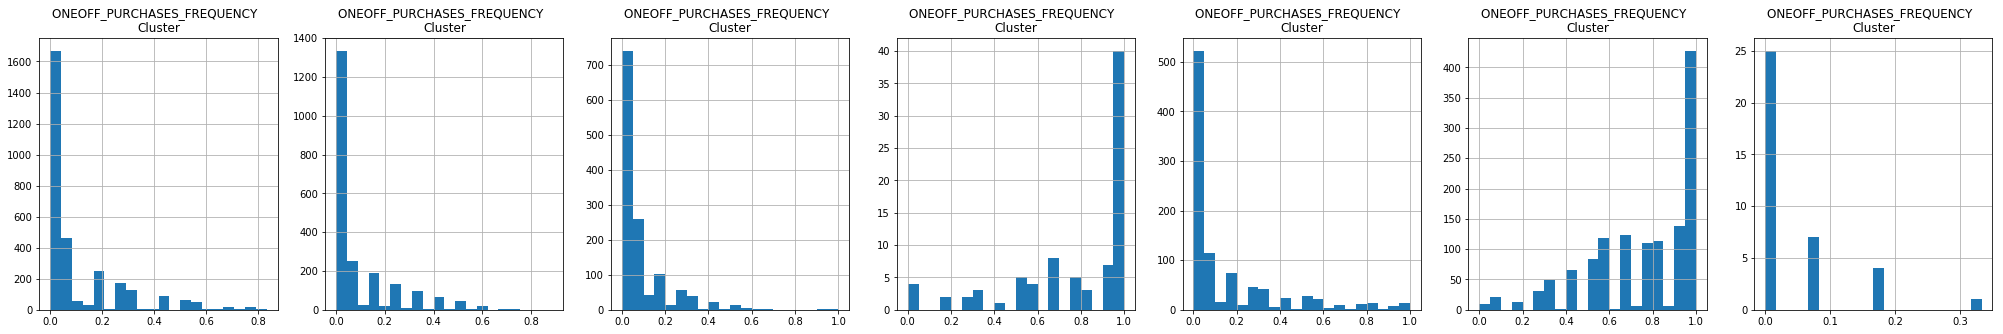

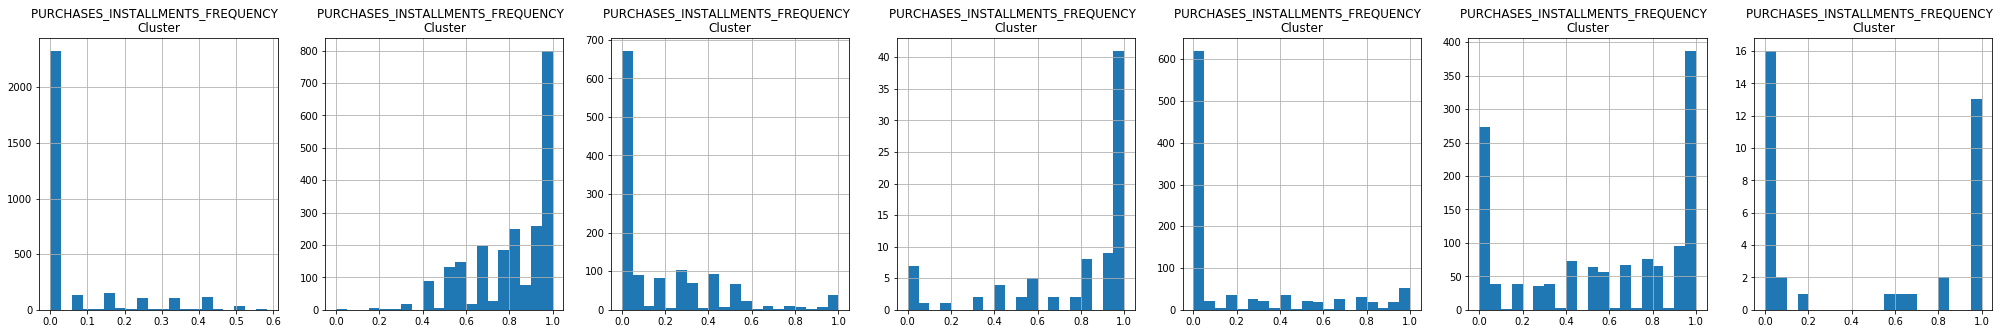

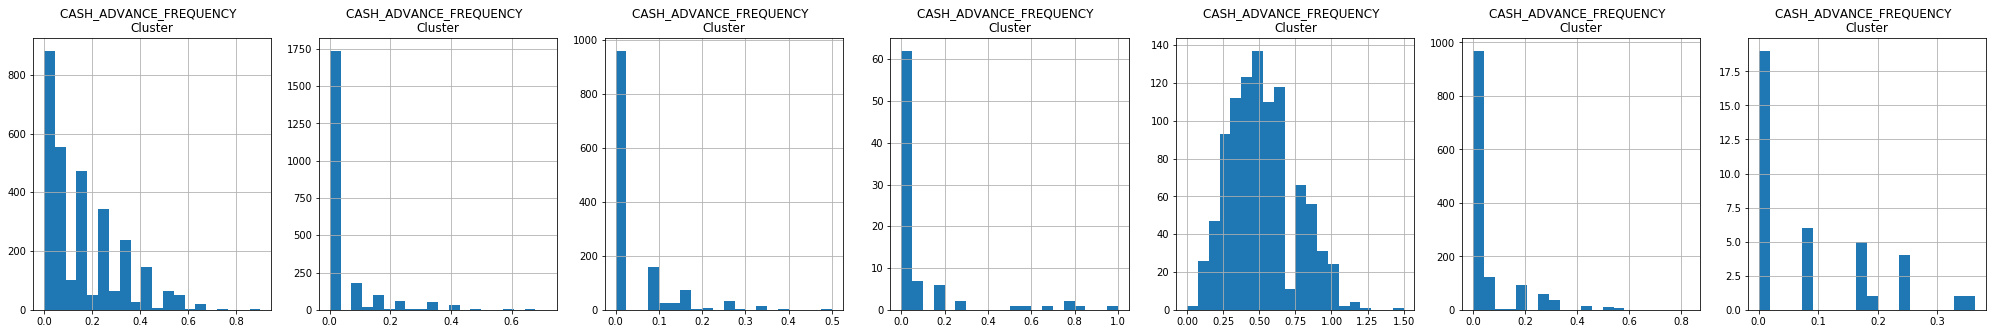

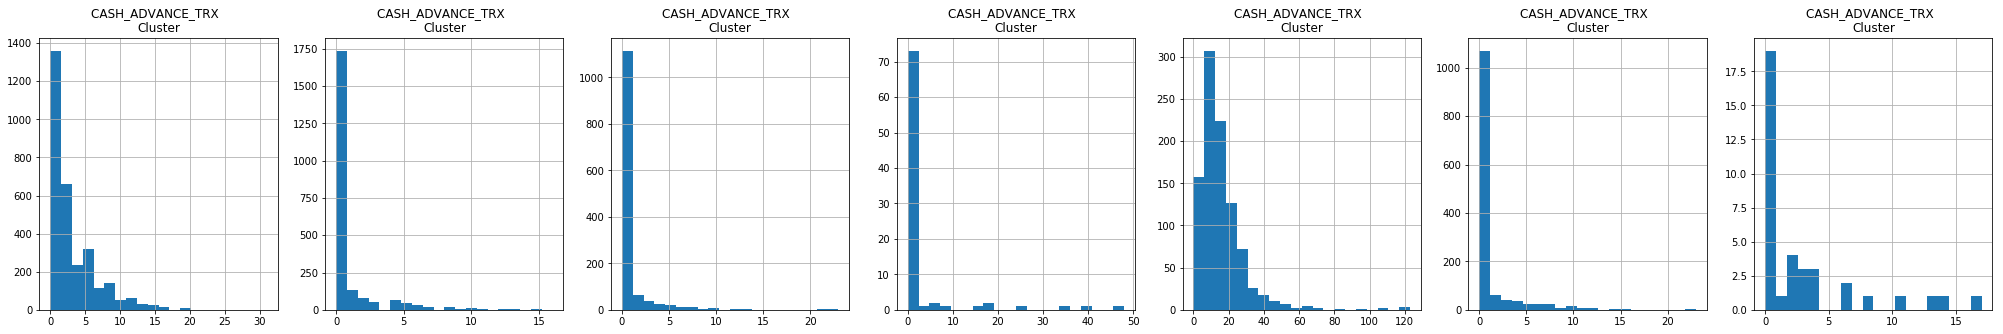

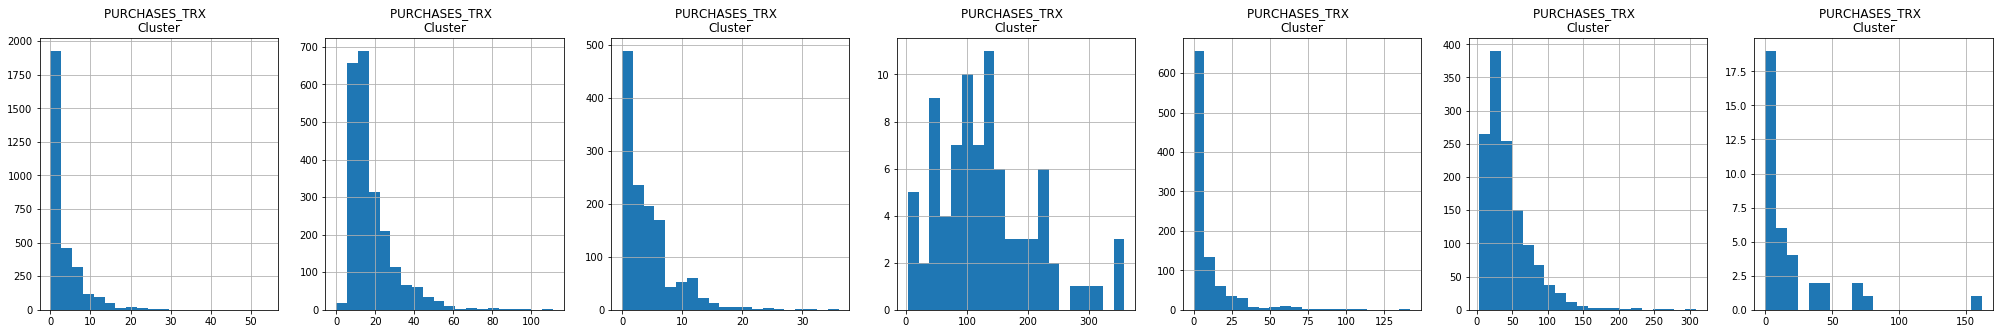

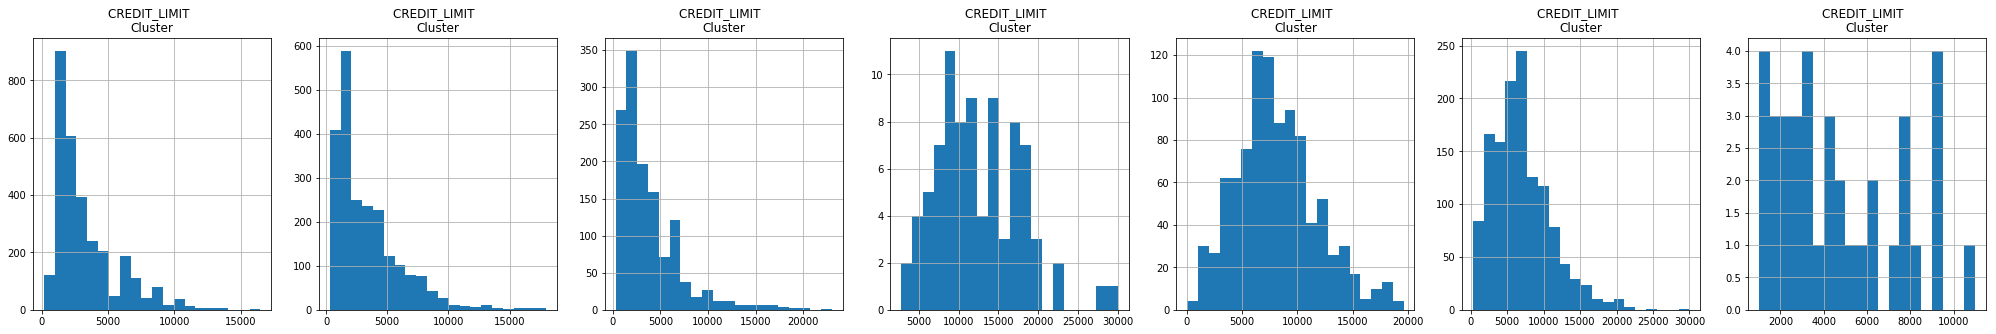

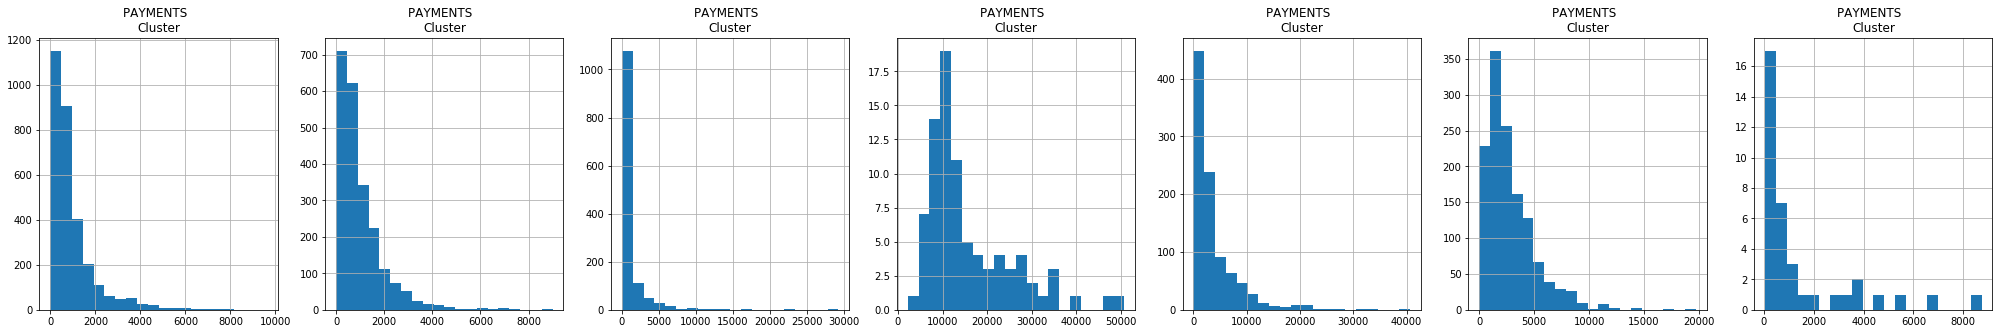

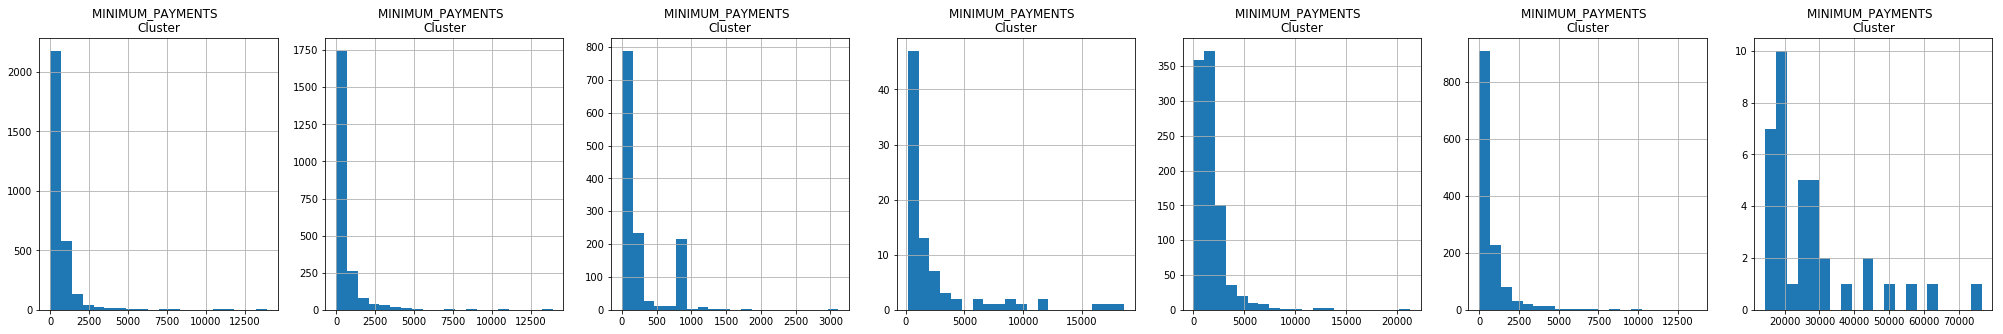

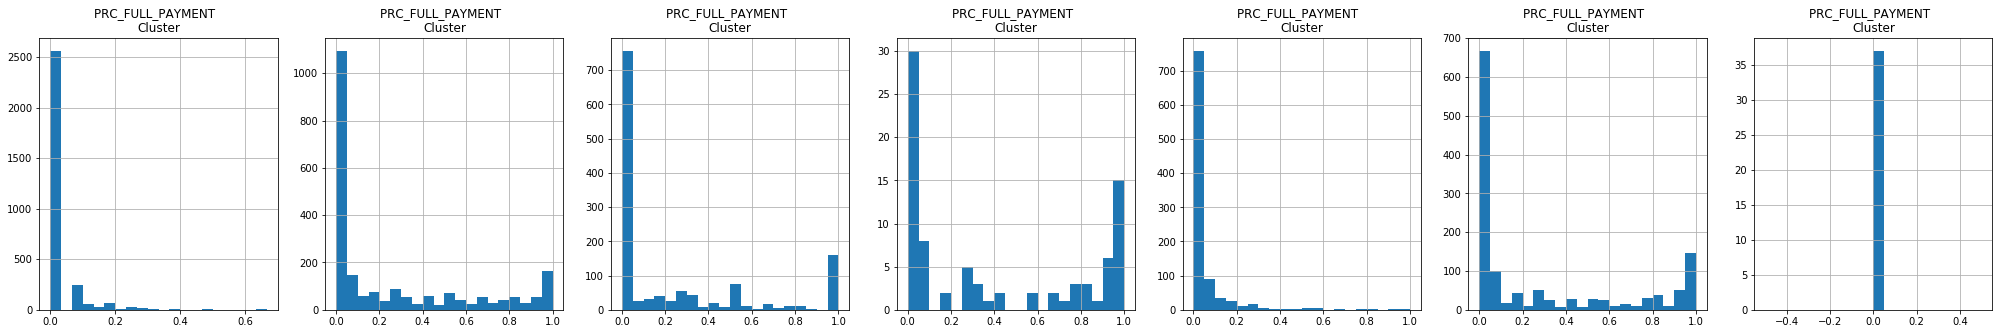

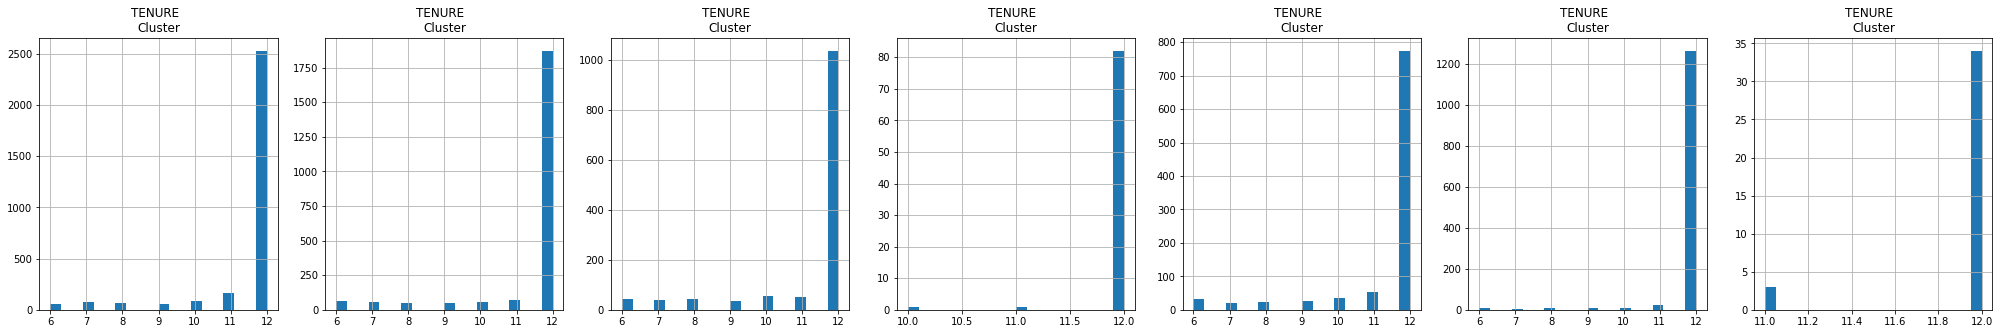

In [26]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=creditcard_cluster[creditcard_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}  \nCluster'.format(i,j))
plt.show()

In [27]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_scaled)
principal_comp

array([[-1.68222033, -1.07645167],
       [-1.13829662,  2.50644046],
       [ 0.96968191, -0.38354889],
       ...,
       [-0.9262032 , -1.81077404],
       [-2.33655033, -0.6579419 ],
       [-0.5564222 , -0.40046797]])

In [28]:
pca_df=pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138297,2.506440
2,0.969682,-0.383549
3,-0.873627,0.043171
4,-1.599434,-0.688581


In [29]:
pca_df=pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

In [30]:
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,0
1,-1.138297,2.506440,4
2,0.969682,-0.383549,5
3,-0.873627,0.043171,0
4,-1.599434,-0.688581,0


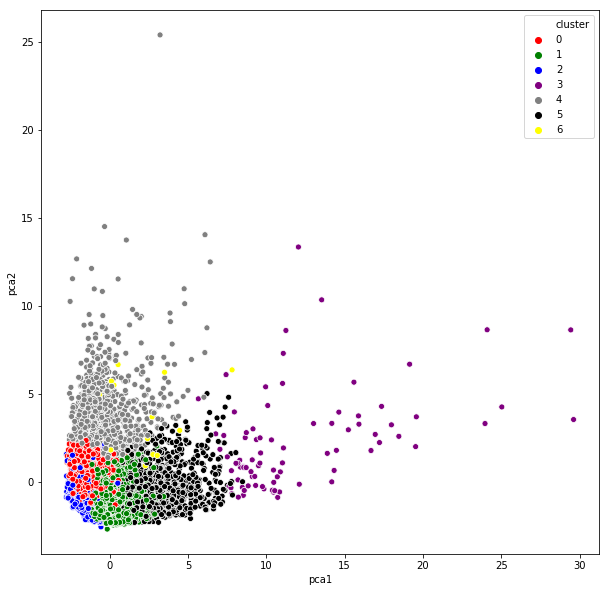

In [32]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster", data=pca_df, palette=['red','green','blue','purple','gray','black','yellow'])
plt.show()